# Python 实现 Logistics Regression
**关键词**
- sigmod函数
- 决策边界

In [24]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Apr 20 13:44:48 2018

@author: alvin
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**辅助函数**
- 画图

In [25]:
def _plot_data1(X,y):
    pos = X[np.where(y==1)[0]]
    neg = X[np.where(y==0)[0]]
    plt.figure(figsize=(10,6))
    plt.grid(True)
    plt.plot(pos[:,0],pos[:,1],'k+',label='Admitted')
    plt.plot(neg[:,0],neg[:,1],'go',label='Not admitted')
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend()
    
def _CostFunction(theta,X,y,_lambda=0.):
    
    # 这里的logitisc回归的损失函数与之前的有所不同【推导】
    # 因此在ng的讲义中提出了概率假设的前提，因此这里的假设函数就是最大似然函数
    J = 0
    grad = np.zeros(theta.size)
    
    h_theta = _sigmod(np.dot(X,theta)) # X*theta 为一个 m * 1 的向量
    # 由于h_theta是 m*1 自然y需要转置才能取得一个实数值
    cost = -1 * np.dot(np.transpose(y),np.log(h_theta)) - np.dot(np.transpose(1-y),np.log(1-h_theta))
   
    # 标准化部分 【公式的由来结合coursera上的ppt】
    theta_exp_0 = theta[1:].reshape((theta[1:].shape[0],1)) #  注意它现在是 n-1 * 1
    reg_cost = (_lambda/(2 * m)) * np.dot(theta_exp_0.T,theta_exp_0)
    reg_grad = theta_exp_0
    print(theta_exp_0.shape)
    reg_grad_zero = np.zeros((1,reg_grad.shape[1]))
   
    reg_grad = (_lambda/ m) * np.concatenate((reg_grad_zero,reg_grad),axis=0)
    print(reg_grad.shape)
    J = (1/m) * cost + reg_cost
    grad = (1/m) * np.dot(np.transpose(X),(h_theta - y)) + reg_grad
    
    return J,grad

def _plot_sigmod(X):
    plt.figure(figsize=(8,6))
    plt.plot(X,_sigmod(X))
    plt.title('Sigmod Function')
    plt.grid(True)

- Sigmod函数

In [26]:
def _sigmod(Z):
    g = np.zeros(Z.size)
    a = np.exp(-1 * Z) + 1
    g = 1 / a
    return g

- 损失函数计算

In [27]:
def _CostFunction_J(theta,X,y,_lambda=0.):
    J = 0 
    h_theta = _sigmod(np.dot(X,theta)) # X*theta 为一个 m * 1 的向量 
    cost = -1 * np.dot(np.transpose(y),np.log(h_theta)) - np.dot(np.transpose(1-y),np.log(1-h_theta))
    J = (1/m) * cost
    return J

**主函数**

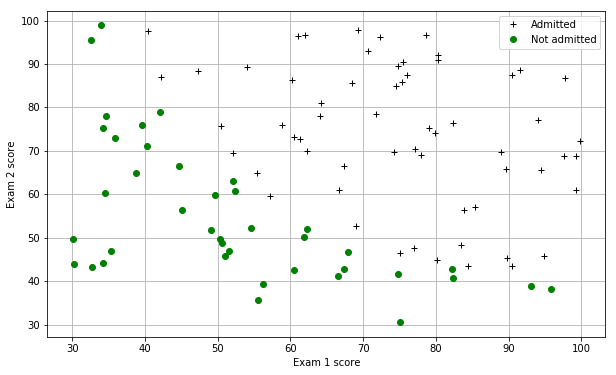

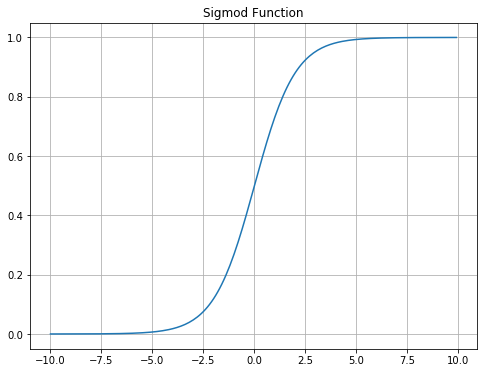

In [28]:
# ===================数据载入与可视化===================
    
datapath = "ex2data1.txt"
data = np.loadtxt(datapath,delimiter=',',usecols=(0,1,2),unpack=True)
X = np.transpose(np.array(data[:-1]))
O_X = X
y = np.transpose(np.array(data[-1:]))
O_y = y;
m = y.size
_plot_data1(X,y)

# ===================Sigmod函数图像====================
_plot_sigmod(np.arange(-10,10,.1))
plt.show()

In [29]:
# =======================计算损失函数============================

b = np.ones((X.shape[0],1));
X = np.concatenate((b,X),axis=1); #在X的前一列加上一项
initial_theta = np.zeros((X.shape[1],1)); # 初始化theta
cost, grad = _CostFunction(initial_theta, X, y); # 得到初始化的cost和grad值

print(cost) # 输出初始后的cost值
print(grad) # 输出初始的grad

test_theta = np.array([[-24,0.2,0.2]]).T
cost, grad = _CostFunction(test_theta, X, y); # 得到测试的cost和grad值
print(cost) 
print(grad) 

(2, 1)
(3, 1)
[[ 0.69314718]]
[[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]
(2, 1)
(3, 1)
[[ 0.21833019]]
[[ 0.04290299]
 [ 2.56623412]
 [ 2.64679737]]


Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287
[ 0.2034977]


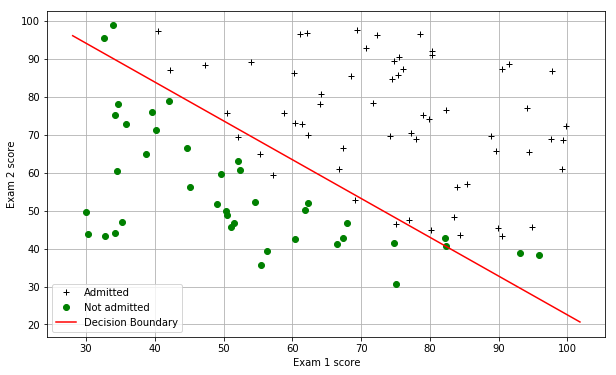

In [30]:
# ===================寻找最有参数theta并画出边界线===========================
   #作业中通过最优化求解函数fminunc来找到最小的一个非限制函数的值，对于logistic而言就是找到能使cost 
   # function最小的theta值，用这个的好处是只需要提供一个损失函数，而不需要设置学习率
   # 在python中，从网上找到也有类似的方法，使用scipy.optimize (https://docs.scipy.org/doc/scipy-0.10.0/reference/tutorial/optimize.html)
   
from scipy import optimize
result = optimize.fmin(_CostFunction_J, x0=initial_theta, args=(X, y, 0), maxiter=400, full_output=True)
op_theta = result[0]
op_cost = result[1]

print(_CostFunction_J(op_theta,X,y)) #   输出Cost最小值

plot_x = np.array([np.min(X[:,1])-2,np.max(X[:,1])+2])
plot_y = (-1./op_theta[2])*(op_theta[0] + op_theta[1]*plot_x)
_plot_data1(O_X,O_y)
plt.plot(plot_x,plot_y,'r-',label='Decision Boundary')
plt.legend()
plt.show()